In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/10_Oct.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.500000,70.000000,1,1,0,2778.0,2744.0,2782.0,3085.0,3280.0,3160.0,2752.083333,2701.0
1,26.333333,70.500000,1,1,0,2747.0,2758.0,2777.0,3063.0,3255.0,3181.0,2745.083333,2693.0
2,26.166667,71.000000,1,1,0,2743.0,2765.0,2779.0,3061.0,3281.0,3223.0,2736.500000,2676.0
3,26.000000,71.500000,1,1,0,2705.0,2765.0,2763.0,3033.0,3257.0,3226.0,2728.250000,2664.0
4,25.833333,72.000000,2,1,0,2701.0,2778.0,2744.0,3045.0,3241.0,3191.0,2722.000000,2669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,21.622452,82.539116,23,5,1,2176.0,2229.0,2304.0,2158.0,1800.0,2184.0,2193.916667,2138.0
8924,21.622452,82.539116,24,5,1,2143.0,2206.0,2275.0,2140.0,1795.0,2166.0,2180.500000,2114.0
8925,21.622452,82.539116,24,5,1,2153.0,2189.0,2257.0,2108.0,1775.0,2152.0,2165.916667,2082.0
8926,21.400000,82.539116,24,5,1,2141.0,2183.0,2237.0,2111.0,1772.0,2146.0,2153.416667,2087.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,2.276463,1.799929,0.710560
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,2.196030,1.867971,0.688968
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,2.279680,2.004053,0.662493
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,2.202465,2.013774,0.637046
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,2.150988,1.900371,0.617767


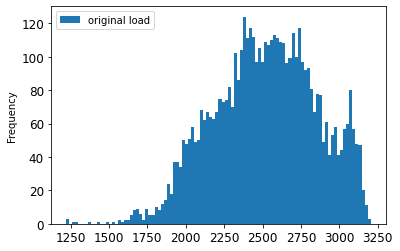

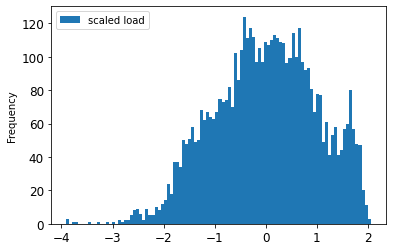

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

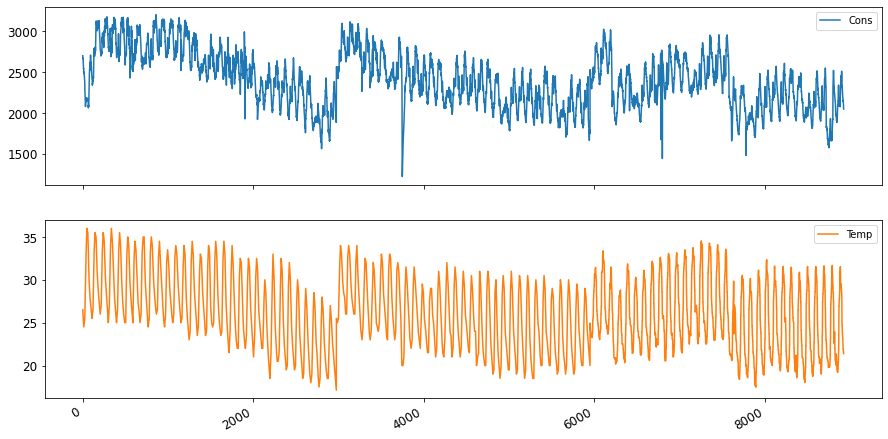

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,2.276463,1.799929,0.710560,0.520183
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,2.196030,1.867971,0.688968,0.469032
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,2.279680,2.004053,0.662493,0.432926
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,2.202465,2.013774,0.637046,0.447970
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,2.150988,1.900371,0.617767,0.378766
5,0.378766,-0.287235,0.995123,-1.516262,-1.437624,-1.570784,0.517734,0.678396,0.709695,1.456271,2.006210,1.777249,0.588979,0.342659
6,0.342659,-0.326992,1.030902,-1.516262,-1.437624,-1.570784,0.466466,0.666312,0.730881,1.399418,1.970820,1.790209,0.555306,0.273455
7,0.273455,-0.366750,1.066682,-1.516262,-1.437624,-1.570784,0.430276,0.551518,0.730881,1.342564,1.858215,1.693007,0.515721,0.201241
8,0.201241,-0.406508,1.102462,-1.371824,-1.437624,-1.570784,0.445355,0.539435,0.770228,1.241492,1.803521,1.615246,0.466626,0.068850
9,0.068850,-0.446266,1.138241,-1.371824,-1.437624,-1.570784,0.375992,0.515267,0.676402,1.105675,1.700567,1.453243,0.414189,0.080886


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.544255,-0.088446,0.816225,-1.660699,-1.437624,-1.570784,0.774076,0.669333,0.782334,1.705795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544255
1,0.520183,-0.128203,0.852004,-1.660699,-1.437624,-1.570784,0.680587,0.711626,0.767201,1.636307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544255,0.520183
2,0.469032,-0.167961,0.887784,-1.660699,-1.437624,-1.570784,0.668524,0.732772,0.773254,1.629990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544255,0.520183,0.469032
3,0.432926,-0.207719,0.923564,-1.660699,-1.437624,-1.570784,0.553924,0.732772,0.724828,1.541552,...,NaN,NaN,NaN,NaN,NaN,NaN,0.544255,0.520183,0.469032,0.432926
4,0.447970,-0.247477,0.959343,-1.516262,-1.437624,-1.570784,0.541860,0.772044,0.667322,1.579454,...,NaN,NaN,NaN,NaN,NaN,0.544255,0.520183,0.469032,0.432926,0.447970
5,0.378766,-0.287235,0.995123,-1.516262,-1.437624,-1.570784,0.517734,0.678396,0.709695,1.456271,...,NaN,NaN,NaN,NaN,0.544255,0.520183,0.469032,0.432926,0.447970,0.378766
6,0.342659,-0.326992,1.030902,-1.516262,-1.437624,-1.570784,0.466466,0.666312,0.730881,1.399418,...,NaN,NaN,NaN,0.544255,0.520183,0.469032,0.432926,0.447970,0.378766,0.342659
7,0.273455,-0.366750,1.066682,-1.516262,-1.437624,-1.570784,0.430276,0.551518,0.730881,1.342564,...,NaN,NaN,0.544255,0.520183,0.469032,0.432926,0.447970,0.378766,0.342659,0.273455
8,0.201241,-0.406508,1.102462,-1.371824,-1.437624,-1.570784,0.445355,0.539435,0.770228,1.241492,...,NaN,0.544255,0.520183,0.469032,0.432926,0.447970,0.378766,0.342659,0.273455,0.201241
9,0.068850,-0.446266,1.138241,-1.371824,-1.437624,-1.570784,0.375992,0.515267,0.676402,1.105675,...,0.544255,0.520183,0.469032,0.432926,0.447970,0.378766,0.342659,0.273455,0.201241,0.068850


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,0.080886,-0.486023,1.174021,-1.371824,-1.437624,-1.570784,0.339802,0.463912,0.664295,1.124626,...,0.520183,0.469032,0.432926,0.447970,0.378766,0.342659,0.273455,0.201241,0.068850,0.080886
11,0.077877,-0.525781,1.209801,-1.371824,-1.437624,-1.570784,0.270439,0.427661,0.549283,1.051980,...,0.469032,0.432926,0.447970,0.378766,0.342659,0.273455,0.201241,0.068850,0.080886,0.077877
12,0.002655,-0.565539,1.245580,-1.227387,-1.437624,-1.570784,0.198060,0.442766,0.537176,1.001444,...,0.432926,0.447970,0.378766,0.342659,0.273455,0.201241,0.068850,0.080886,0.077877,0.002655
13,-0.033452,-0.545660,1.227691,-1.227387,-1.437624,-1.570784,0.065366,0.373285,0.512963,0.957224,...,0.447970,0.378766,0.342659,0.273455,0.201241,0.068850,0.080886,0.077877,0.002655,-0.033452
14,-0.108674,-0.525781,1.209801,-1.227387,-1.437624,-1.570784,0.077429,0.337034,0.461510,0.909846,...,0.378766,0.342659,0.273455,0.201241,0.068850,0.080886,0.077877,0.002655,-0.033452,-0.108674


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,0.077877
11,0.002655
12,-0.033452
13,-0.108674
14,-0.060532
...,...
4987,-1.435593
4988,-1.531878
4989,-1.697366
4990,-1.703384


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,0.080886,0.080886,0.068850,0.201241,0.273455,0.342659,0.378766,0.447970,0.432926,0.469032,...,-1.371824,-1.437624,-1.570784,0.339802,0.463912,0.664295,1.124626,1.591179,1.339841,0.363809
11,0.077877,0.077877,0.080886,0.068850,0.201241,0.273455,0.342659,0.378766,0.447970,0.432926,...,-1.371824,-1.437624,-1.570784,0.270439,0.427661,0.549283,1.051980,1.571876,1.352801,0.322939
12,0.002655,0.002655,0.077877,0.080886,0.068850,0.201241,0.273455,0.342659,0.378766,0.447970,...,-1.227387,-1.437624,-1.570784,0.198060,0.442766,0.537176,1.001444,1.552572,1.323640,0.276671
13,-0.033452,-0.033452,0.002655,0.077877,0.080886,0.068850,0.201241,0.273455,0.342659,0.378766,...,-1.227387,-1.437624,-1.570784,0.065366,0.373285,0.512963,0.957224,1.404576,1.200518,0.229376
14,-0.108674,-0.108674,-0.033452,0.002655,0.077877,0.080886,0.068850,0.201241,0.273455,0.342659,...,-1.227387,-1.437624,-1.570784,0.077429,0.337034,0.461510,0.909846,1.340230,1.245879,0.180023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,-1.387451,-1.387451,-1.393469,-1.634180,-1.766571,-1.748518,-1.709402,-1.637189,-1.610109,-1.528869,...,1.516927,-1.437624,-1.570784,-1.756172,-1.541966,-1.321183,-1.203208,-1.011610,-0.882842,-1.593059
4988,-1.435593,-1.435593,-1.387451,-1.393469,-1.634180,-1.766571,-1.748518,-1.709402,-1.637189,-1.610109,...,1.661365,-1.437624,-1.570784,-1.774266,-1.623530,-1.293944,-1.225317,-0.985872,-0.924963,-1.606683
4989,-1.531878,-1.531878,-1.435593,-1.387451,-1.393469,-1.634180,-1.766571,-1.748518,-1.709402,-1.637189,...,1.661365,-1.437624,-1.570784,-1.641572,-1.650718,-1.421063,-1.291646,-1.072739,-0.934683,-1.617735
4990,-1.697366,-1.697366,-1.531878,-1.435593,-1.387451,-1.393469,-1.634180,-1.766571,-1.748518,-1.709402,...,1.661365,-1.437624,-1.570784,-1.400308,-1.723220,-1.514889,-1.436939,-1.211083,-1.054566,-1.634957


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1884.0,19.500000,73.333333,1.0,2.0,1.0,2011.0,1977.0,1976.0,2026.0,2109.0,2168.0,1973.750000
4994,1913.0,19.500000,73.666667,1.0,2.0,1.0,1956.0,2057.0,1952.0,2033.0,2113.0,2181.0,1970.500000
4995,1898.0,19.500000,74.000000,1.0,2.0,1.0,1954.0,2059.0,1939.0,2023.0,2090.0,2170.0,1967.083333
4996,1871.0,19.500000,74.333333,2.0,2.0,1.0,1920.0,2043.0,1933.0,1994.0,2058.0,2156.0,1961.916667
4997,1865.0,19.500000,74.666667,2.0,2.0,1.0,1884.0,2011.0,1977.0,1988.0,2080.0,2132.0,1952.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,1745.0,20.260870,73.250000,24.0,4.0,1.0,1764.0,1739.0,1819.0,2036.0,2075.0,1960.0,1752.166667
5950,1748.0,20.130435,73.166667,24.0,4.0,1.0,1794.0,1727.0,1810.0,2003.0,2027.0,1929.0,1747.000000
5951,1755.0,20.000000,73.083333,24.0,4.0,1.0,1753.0,1664.0,1798.0,1979.0,2002.0,1892.0,1743.416667
5952,2530.0,24.952452,89.775314,1.0,3.0,1.0,2649.0,2681.0,2691.0,2280.0,2514.0,3284.0,2639.333333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.94981,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,-0.131041,0.025501,-0.815821
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.94981,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,-0.110425,0.088777,-0.833214
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.94981,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,-0.228969,0.035236,-0.851498
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.94981,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,-0.393900,-0.032906,-0.879148
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.94981,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,-0.280510,-0.149722,-0.929097
4998,-1.234529,-1.224886,0.900541,-1.513750,-0.94981,0.499675,-1.072172,-0.867087,-0.362255,-0.756377,-0.311435,-0.154589,-1.008479
4999,-1.279764,-1.224886,0.924583,-1.513750,-0.94981,0.499675,-1.147790,-0.877229,-0.352043,-0.761641,-0.409363,-0.076712,-1.092767
5000,-1.365207,-1.224886,0.948625,-1.369419,-0.94981,0.499675,-1.283902,-1.049648,-0.433737,-0.898491,-0.543370,-0.193528,-1.177501
5001,-1.541119,-1.224886,0.972666,-1.369419,-0.94981,0.499675,-1.314150,-1.232209,-0.597124,-1.040604,-0.734072,-0.174058,-1.263573
5002,-1.551172,-1.224886,0.996708,-1.369419,-0.94981,0.499675,-1.243573,-1.085146,-0.877945,-0.951126,-0.764996,-0.436893,-1.326008


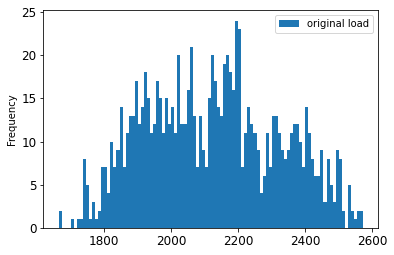

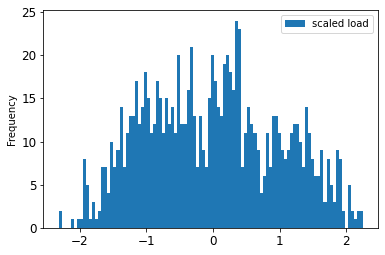

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.94981,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,-0.131041,0.025501,-0.815821,-1.063643
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.94981,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,-0.110425,0.088777,-0.833214,-1.139034
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.94981,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,-0.228969,0.035236,-0.851498,-1.274738
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.94981,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,-0.393900,-0.032906,-0.879148,-1.304894
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.94981,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,-0.280510,-0.149722,-0.929097,-1.234529
4998,-1.234529,-1.224886,0.900541,-1.513750,-0.94981,0.499675,-1.072172,-0.867087,-0.362255,-0.756377,-0.311435,-0.154589,-1.008479,-1.279764
4999,-1.279764,-1.224886,0.924583,-1.513750,-0.94981,0.499675,-1.147790,-0.877229,-0.352043,-0.761641,-0.409363,-0.076712,-1.092767,-1.365207
5000,-1.365207,-1.224886,0.948625,-1.369419,-0.94981,0.499675,-1.283902,-1.049648,-0.433737,-0.898491,-0.543370,-0.193528,-1.177501,-1.541119
5001,-1.541119,-1.224886,0.972666,-1.369419,-0.94981,0.499675,-1.314150,-1.232209,-0.597124,-1.040604,-0.734072,-0.174058,-1.263573,-1.551172
5002,-1.551172,-1.224886,0.996708,-1.369419,-0.94981,0.499675,-1.243573,-1.085146,-0.877945,-0.951126,-0.764996,-0.436893,-1.326008,-1.596406


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,-1.209399,-1.224886,0.780334,-1.658081,-0.94981,0.499675,-0.578133,-0.760593,-0.775829,-0.508995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.209399
4994,-1.063643,-1.224886,0.804375,-1.658081,-0.94981,0.499675,-0.855400,-0.354901,-0.898369,-0.472151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.209399,-1.063643
4995,-1.139034,-1.224886,0.828417,-1.658081,-0.94981,0.499675,-0.865482,-0.344759,-0.964745,-0.524785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.209399,-1.063643,-1.139034
4996,-1.274738,-1.224886,0.852458,-1.513750,-0.94981,0.499675,-1.036883,-0.425897,-0.995380,-0.677426,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.209399,-1.063643,-1.139034,-1.274738
4997,-1.304894,-1.224886,0.876500,-1.513750,-0.94981,0.499675,-1.218367,-0.588174,-0.770723,-0.709006,...,NaN,NaN,NaN,NaN,NaN,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894
4998,-1.234529,-1.224886,0.900541,-1.513750,-0.94981,0.499675,-1.072172,-0.867087,-0.362255,-0.756377,...,NaN,NaN,NaN,NaN,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529
4999,-1.279764,-1.224886,0.924583,-1.513750,-0.94981,0.499675,-1.147790,-0.877229,-0.352043,-0.761641,...,NaN,NaN,NaN,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764
5000,-1.365207,-1.224886,0.948625,-1.369419,-0.94981,0.499675,-1.283902,-1.049648,-0.433737,-0.898491,...,NaN,NaN,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207
5001,-1.541119,-1.224886,0.972666,-1.369419,-0.94981,0.499675,-1.314150,-1.232209,-0.597124,-1.040604,...,NaN,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119
5002,-1.551172,-1.224886,0.996708,-1.369419,-0.94981,0.499675,-1.243573,-1.085146,-0.877945,-0.951126,...,-1.209399,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,-1.596406,-1.224886,1.020749,-1.369419,-0.94981,0.499675,-1.288943,-1.161213,-0.888157,-1.056395,...,-1.063643,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172,-1.596406
5004,-1.611484,-1.224886,1.044791,-1.225087,-0.94981,0.499675,-1.374644,-1.298134,-1.061756,-1.261670,...,-1.139034,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172,-1.596406,-1.611484
5005,-1.681849,-1.033974,0.852458,-1.225087,-0.94981,0.499675,-1.551086,-1.328561,-1.245567,-1.251143,...,-1.274738,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172,-1.596406,-1.611484,-1.681849
5006,-1.656719,-0.843062,0.660126,-1.225087,-0.94981,0.499675,-1.561169,-1.257565,-1.097497,-1.166927,...,-1.304894,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172,-1.596406,-1.611484,-1.681849,-1.656719
5007,-1.626563,-0.652150,0.467793,-1.225087,-0.94981,0.499675,-1.606539,-1.303205,-1.174085,-1.214299,...,-1.234529,-1.279764,-1.365207,-1.541119,-1.551172,-1.596406,-1.611484,-1.681849,-1.656719,-1.626563


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,-1.611484
5004,-1.681849
5005,-1.656719
5006,-1.626563
5007,-1.651693
...,...
5948,-1.908022
5949,-1.892944
5950,-1.857762
5951,2.037440


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,-1.596406,-1.596406,-1.551172,-1.541119,-1.365207,-1.279764,-1.234529,-1.304894,-1.274738,-1.139034,...,-1.369419,-0.949810,0.499675,-1.288943,-1.161213,-0.888157,-1.056395,-0.780459,-0.548841,-1.391566
5004,-1.611484,-1.611484,-1.596406,-1.551172,-1.541119,-1.365207,-1.279764,-1.234529,-1.304894,-1.274738,...,-1.225087,-0.949810,0.499675,-1.374644,-1.298134,-1.061756,-1.261670,-0.888695,-0.621851,-1.443298
5005,-1.681849,-1.681849,-1.611484,-1.596406,-1.551172,-1.541119,-1.365207,-1.279764,-1.234529,-1.304894,...,-1.225087,-0.949810,0.499675,-1.551086,-1.328561,-1.245567,-1.251143,-0.862924,-0.631586,-1.485219
5006,-1.656719,-1.656719,-1.681849,-1.611484,-1.596406,-1.551172,-1.541119,-1.365207,-1.279764,-1.234529,...,-1.225087,-0.949810,0.499675,-1.561169,-1.257565,-1.097497,-1.166927,-0.950544,-0.670524,-1.537843
5007,-1.626563,-1.626563,-1.656719,-1.681849,-1.611484,-1.596406,-1.551172,-1.541119,-1.365207,-1.279764,...,-1.225087,-0.949810,0.499675,-1.606539,-1.303205,-1.174085,-1.214299,-0.904157,-0.675391,-1.581102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,-1.661745,-1.661745,-1.867814,-1.661745,-1.812527,-2.269899,-2.315134,-1.998491,-1.938179,-1.807501,...,1.661535,0.167408,0.499675,-2.282061,-1.835676,-1.424271,-0.372145,-0.115579,-0.860349,-1.968649
5949,-1.908022,-1.908022,-1.661745,-1.867814,-1.661745,-1.812527,-2.269899,-2.315134,-1.998491,-1.938179,...,1.661535,0.167408,0.499675,-1.823311,-1.967526,-1.577447,-0.456360,-0.306281,-0.986899,-2.001650
5950,-1.892944,-1.892944,-1.908022,-1.661745,-1.867814,-1.661745,-1.812527,-2.269899,-2.315134,-1.998491,...,1.661535,0.167408,0.499675,-1.672075,-2.028379,-1.623399,-0.630054,-0.553678,-1.137786,-2.029300
5951,-1.857762,-1.857762,-1.892944,-1.908022,-1.661745,-1.867814,-1.661745,-1.812527,-2.269899,-2.315134,...,1.661535,0.167408,0.499675,-1.878765,-2.347862,-1.684669,-0.756377,-0.682531,-1.317877,-2.048477


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(950, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(950,2,1,12)
print(X_valid.shape)

(950, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 1s 50ms/step - loss: 0.3278 - val_loss: 0.2587
Epoch 2/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0750 - val_loss: 0.1205
Epoch 3/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0406 - val_loss: 0.0792
Epoch 4/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0279 - val_loss: 0.0653
Epoch 5/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0221 - val_loss: 0.0586
Epoch 6/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0186 - val_loss: 0.0547
Epoch 7/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0167 - val_loss: 0.0530
Epoch 8/300
17/17 [==============================] - 0s 22ms/step - loss: 0.0166 - val_loss: 0.0544
Epoch 9/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0168 - val_loss: 0.0557
Epoch 10/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0160 - val_loss: 0.0520

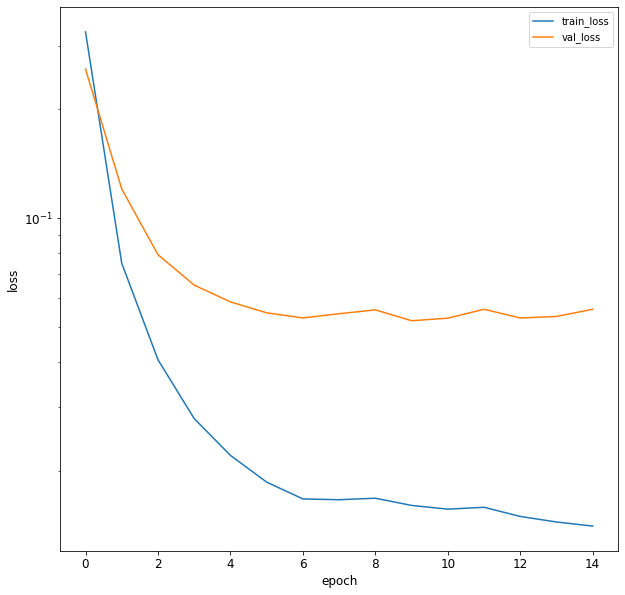

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,2486.0,24.552451,91.158517,1.0,3.0,1.0,2581.0,2682.0,2701.0,2252.0,2485.0,3246.0,2606.666667
5955,2479.0,24.152450,92.541720,1.0,3.0,1.0,2565.0,2656.0,2694.0,2238.0,2493.0,3226.0,2588.750000
5956,2497.0,24.152450,92.541720,2.0,3.0,1.0,2530.0,2649.0,2681.0,2224.0,2487.0,3198.0,2573.416667
5957,2461.0,24.152450,92.541720,2.0,3.0,1.0,2498.0,2595.0,2663.0,2190.0,2455.0,3193.0,2556.583333
5958,2450.0,24.002451,92.985790,2.0,3.0,1.0,2486.0,2581.0,2682.0,2174.0,2442.0,3161.0,2537.250000
5959,2435.0,23.852451,93.429860,2.0,3.0,1.0,2479.0,2565.0,2656.0,2144.0,2424.0,3146.0,2518.833333
5960,2417.0,23.852451,93.429860,3.0,3.0,1.0,2497.0,2530.0,2649.0,2146.0,2388.0,3126.0,2499.500000
5961,2393.0,23.852451,93.429860,3.0,3.0,1.0,2461.0,2498.0,2595.0,2131.0,2373.0,3110.0,2482.666667
5962,2373.0,23.572451,92.685175,3.0,3.0,1.0,2450.0,2486.0,2581.0,2127.0,2357.0,3089.0,2465.333333
5963,2360.0,23.292452,91.940490,3.0,3.0,1.0,2435.0,2479.0,2565.0,2128.0,2369.0,3072.0,2448.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


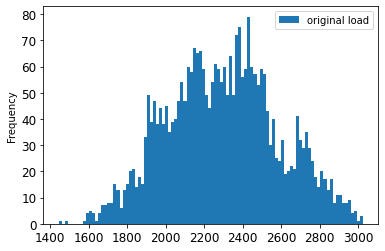

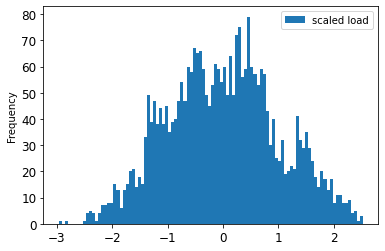

In [36]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,0.658068,-0.234648,1.447198,-1.663428,-0.521692,0.590035,0.986057,1.333729,1.395849,-0.193029,0.590068,3.096618,1.109722,0.633732
5955,0.633732,-0.329547,1.526921,-1.663428,-0.521692,0.590035,0.930440,1.243423,1.371563,-0.241113,0.618895,3.027920,1.045394,0.696309
5956,0.696309,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.808778,1.219110,1.326460,-0.289197,0.597275,2.931743,0.990341,0.571156
5957,0.571156,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.697545,1.031553,1.264011,-0.405972,0.481967,2.914568,0.929902,0.532914
5958,0.532914,-0.365134,1.552516,-1.518879,-0.521692,0.590035,0.655832,0.982927,1.329930,-0.460926,0.435123,2.804651,0.860488,0.480767
5959,0.480767,-0.400721,1.578111,-1.518879,-0.521692,0.590035,0.631499,0.927354,1.239725,-0.563963,0.370262,2.753128,0.794364,0.418190
5960,0.418190,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.694069,0.805789,1.215439,-0.557094,0.240540,2.684430,0.724950,0.334754
5961,0.334754,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.568930,0.694644,1.028090,-0.608612,0.186490,2.629472,0.664511,0.265224
5962,0.265224,-0.467150,1.535190,-1.374330,-0.521692,0.590035,0.530694,0.652965,0.979518,-0.622350,0.128836,2.557339,0.602277,0.220030
5963,0.220030,-0.533580,1.492269,-1.374330,-0.521692,0.590035,0.478553,0.628652,0.924007,-0.618916,0.172076,2.498945,0.540941,0.237413


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5954,0.658068,-0.234648,1.447198,-1.663428,-0.521692,0.590035,0.986057,1.333729,1.395849,-0.193029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.658068
5955,0.633732,-0.329547,1.526921,-1.663428,-0.521692,0.590035,0.930440,1.243423,1.371563,-0.241113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.658068,0.633732
5956,0.696309,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.808778,1.219110,1.326460,-0.289197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.658068,0.633732,0.696309
5957,0.571156,-0.329547,1.526921,-1.518879,-0.521692,0.590035,0.697545,1.031553,1.264011,-0.405972,...,NaN,NaN,NaN,NaN,NaN,NaN,0.658068,0.633732,0.696309,0.571156
5958,0.532914,-0.365134,1.552516,-1.518879,-0.521692,0.590035,0.655832,0.982927,1.329930,-0.460926,...,NaN,NaN,NaN,NaN,NaN,0.658068,0.633732,0.696309,0.571156,0.532914
5959,0.480767,-0.400721,1.578111,-1.518879,-0.521692,0.590035,0.631499,0.927354,1.239725,-0.563963,...,NaN,NaN,NaN,NaN,0.658068,0.633732,0.696309,0.571156,0.532914,0.480767
5960,0.418190,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.694069,0.805789,1.215439,-0.557094,...,NaN,NaN,NaN,0.658068,0.633732,0.696309,0.571156,0.532914,0.480767,0.418190
5961,0.334754,-0.400721,1.578111,-1.374330,-0.521692,0.590035,0.568930,0.694644,1.028090,-0.608612,...,NaN,NaN,0.658068,0.633732,0.696309,0.571156,0.532914,0.480767,0.418190,0.334754
5962,0.265224,-0.467150,1.535190,-1.374330,-0.521692,0.590035,0.530694,0.652965,0.979518,-0.622350,...,NaN,0.658068,0.633732,0.696309,0.571156,0.532914,0.480767,0.418190,0.334754,0.265224
5963,0.220030,-0.533580,1.492269,-1.374330,-0.521692,0.590035,0.478553,0.628652,0.924007,-0.618916,...,0.658068,0.633732,0.696309,0.571156,0.532914,0.480767,0.418190,0.334754,0.265224,0.220030


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5964,0.237413,-0.533580,1.492269,-1.229782,-0.521692,0.590035,0.415984,0.691171,0.802577,-0.691042,...,0.633732,0.696309,0.571156,0.532914,0.480767,0.418190,0.334754,0.265224,0.220030,0.237413
5965,0.174836,-0.533580,1.492269,-1.229782,-0.521692,0.590035,0.332558,0.566133,0.691556,-0.728822,...,0.696309,0.571156,0.532914,0.480767,0.418190,0.334754,0.265224,0.220030,0.237413,0.174836
5966,0.178312,-0.534766,1.490639,-1.229782,-0.521692,0.590035,0.263037,0.527927,0.649923,-0.735691,...,0.571156,0.532914,0.480767,0.418190,0.334754,0.265224,0.220030,0.237413,0.174836,0.178312
5967,0.147024,-0.535952,1.489009,-1.229782,-0.521692,0.590035,0.217849,0.475827,0.625637,-0.807817,...,0.532914,0.480767,0.418190,0.334754,0.265224,0.220030,0.237413,0.174836,0.178312,0.147024
5968,0.105306,-0.535952,1.489009,-1.085233,-0.521692,0.590035,0.235229,0.413308,0.688087,-0.842163,...,0.480767,0.418190,0.334754,0.265224,0.220030,0.237413,0.174836,0.178312,0.147024,0.105306


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5964,0.174836
5965,0.178312
5966,0.147024
5967,0.105306
5968,0.021870
...,...
8922,-0.551751
8923,-0.635187
8924,-0.746434
8925,-0.729052


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5964,0.237413,0.237413,0.220030,0.265224,0.334754,0.418190,0.480767,0.532914,0.571156,0.696309,...,-1.229782,-0.521692,0.590035,0.415984,0.691171,0.802577,-0.691042,0.125232,2.423378,0.491573
5965,0.174836,0.174836,0.237413,0.220030,0.265224,0.334754,0.418190,0.480767,0.532914,0.571156,...,-1.229782,-0.521692,0.590035,0.332558,0.566133,0.691556,-0.728822,0.038751,2.340940,0.446393
5966,0.178312,0.178312,0.174836,0.237413,0.220030,0.265224,0.334754,0.418190,0.480767,0.532914,...,-1.229782,-0.521692,0.590035,0.263037,0.527927,0.649923,-0.735691,-0.011696,2.255067,0.405104
5967,0.147024,0.147024,0.178312,0.174836,0.237413,0.220030,0.265224,0.334754,0.418190,0.480767,...,-1.229782,-0.521692,0.590035,0.217849,0.475827,0.625637,-0.807817,-0.105384,2.182934,0.363216
5968,0.105306,0.105306,0.147024,0.178312,0.174836,0.237413,0.220030,0.265224,0.334754,0.418190,...,-1.085233,-0.521692,0.590035,0.235229,0.413308,0.688087,-0.842163,-0.152227,2.148585,0.312351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,-0.541321,-0.541321,-0.499604,-0.534368,-0.419644,-0.395309,-0.374450,-0.315350,-0.235390,-0.207578,...,1.516643,0.520991,0.590035,-0.397414,-0.211883,0.098285,-0.457491,-1.853020,-0.530637,-0.322553
8923,-0.551751,-0.551751,-0.541321,-0.499604,-0.534368,-0.419644,-0.395309,-0.374450,-0.315350,-0.235390,...,1.516643,0.520991,0.590035,-0.421746,-0.239670,0.018488,-0.515879,-1.878244,-0.551246,-0.372221
8924,-0.635187,-0.635187,-0.551751,-0.541321,-0.499604,-0.534368,-0.419644,-0.395309,-0.374450,-0.315350,...,1.661192,0.520991,0.590035,-0.536456,-0.319555,-0.082125,-0.577701,-1.896261,-0.613074,-0.420392
8925,-0.746434,-0.746434,-0.635187,-0.551751,-0.541321,-0.499604,-0.534368,-0.419644,-0.395309,-0.374450,...,1.661192,0.520991,0.590035,-0.501695,-0.378601,-0.144575,-0.687607,-1.968328,-0.661163,-0.472752


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2963,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[ 0.15665056],
       [ 0.10294286],
       [ 0.10894717],
       ...,
       [-0.76541966],
       [-0.8667569 ],
       [-0.8330894 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5954][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2296.709146
dtype: float64
Cons    287.694748
dtype: float64


In [47]:
load_mean=2296.709146
load_std=287.694748
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5964,2347.008457
5965,2348.008625
5966,2339.007112
5967,2327.005094
5968,2303.001058
...,...
8922,2137.973311
8923,2113.969275
8924,2081.963894
8925,2086.964734


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[2341.7769],
       [2326.3254],
       [2328.0527],
       ...,
       [2076.502 ],
       [2047.3478],
       [2057.0337]], dtype=float32)

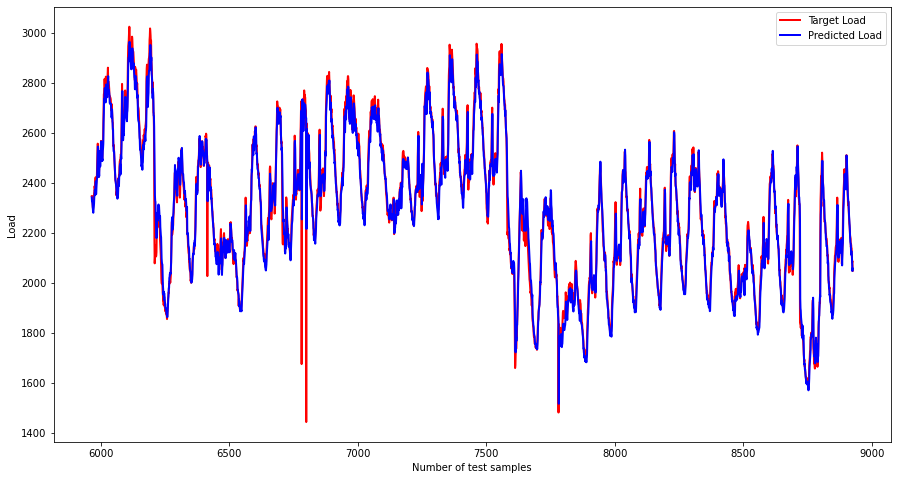

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.3730345658600625


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.327588
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5964  234601.068628
5965  234701.786011
5966  233801.179526
5967  232601.063454
5968  230200.191647
...             ...
8922  213698.426714
8923  211297.154578
8924  208096.651696
8925  208598.371738
8926  204695.374440

[2963 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5964    27.369657
5965   470.160553
5966   119.998387
5967   166.230310
5968     3.909052
...           ...
8922   548.706386
8923    23.047851
8924    29.832793
8925  1569.503204
8926    82.364982

[2963 rows x 1 columns]
y_t+1    2786.194289
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    52.784413
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2963):
    b=a[i]
    print(b)

[2341.7769]
[2326.3254]
[2328.0527]
[2314.112]
[2301.024]
[2286.065]
[2280.445]
[2292.374]
[2304.201]
[2317.3362]
[2344.3018]
[2349.3672]
[2372.2578]
[2361.4756]
[2353.2935]
[2392.974]
[2406.3496]
[2354.5505]
[2376.8018]
[2396.575]
[2412.8152]
[2422.0251]
[2475.318]
[2517.2578]
[2545.25]
[2537.9136]
[2433.5896]
[2423.0613]
[2444.1013]
[2426.734]
[2464.0498]
[2527.836]
[2506.9983]
[2465.6926]
[2504.337]
[2527.544]
[2520.1936]
[2566.1387]
[2492.7651]
[2497.195]
[2487.897]
[2495.6516]
[2489.1443]
[2528.5195]
[2538.9548]
[2556.522]
[2642.2537]
[2677.892]
[2735.099]
[2722.9258]
[2764.293]
[2779.822]
[2758.5469]
[2735.043]
[2721.9946]
[2750.747]
[2793.7922]
[2757.6553]
[2745.8245]
[2757.6428]
[2742.5676]
[2759.0461]
[2794.2427]
[2812.5088]
[2827.0376]
[2771.069]
[2768.9985]
[2770.9075]
[2759.868]
[2749.477]
[2718.88]
[2719.181]
[2718.4253]
[2715.0635]
[2716.9385]
[2708.8152]
[2680.7004]
[2661.683]
[2669.312]
[2693.7495]
[2662.8608]
[2627.2407]
[2614.0808]
[2613.6519]
[2554.01]
[2527.349]
[25

[2332.2927]
[2362.4011]
[2389.7522]
[2365.4236]
[2361.1128]
[2348.237]
[2397.8755]
[2379.375]
[2334.3618]
[2320.9194]
[2309.3198]
[2360.3206]
[2404.6123]
[2481.621]
[2506.8586]
[2550.216]
[2608.4028]
[2626.7065]
[2663.0647]
[2700.6838]
[2682.2654]
[2681.2883]
[2671.003]
[2656.9456]
[2636.2817]
[2668.3457]
[2660.3943]
[2672.9612]
[2682.4893]
[2666.9385]
[2662.1948]
[2668.8179]
[2629.9238]
[2573.038]
[2563.9243]
[2530.8496]
[2540.5266]
[2515.0679]
[2432.519]
[2362.2117]
[2300.3503]
[2280.553]
[2245.7563]
[2253.3042]
[2216.1143]
[2194.8713]
[2199.0542]
[2198.8833]
[2177.5522]
[2117.2607]
[2154.7046]
[2200.338]
[2137.62]
[2154.6719]
[2302.0142]
[2290.6418]
[2253.6482]
[2235.7302]
[2226.475]
[2181.916]
[2184.8591]
[2195.854]
[2190.4753]
[2144.8074]
[2148.468]
[2159.556]
[2143.756]
[2139.2017]
[2124.426]
[2105.8154]
[2090.0994]
[2114.1702]
[2139.5352]
[2172.7183]
[2202.8074]
[2232.7432]
[2241.3557]
[2249.6155]
[2284.3557]
[2306.8318]
[2314.441]
[2307.6594]
[2333.28]
[2312.7615]
[2385.5735]
[

[2508.813]
[2421.6362]
[2419.5344]
[2432.4524]
[2447.0173]
[2431.2976]
[2438.479]
[2434.0325]
[2413.5017]
[2433.3489]
[2484.0054]
[2459.898]
[2463.3508]
[2481.1108]
[2512.7395]
[2487.9219]
[2435.5247]
[2488.5544]
[2500.429]
[2510.1282]
[2562.0051]
[2608.6936]
[2612.7896]
[2672.2773]
[2688.775]
[2704.0305]
[2729.2844]
[2725.0427]
[2723.8164]
[2820.9058]
[2819.6182]
[2784.5754]
[2791.4082]
[2881.6414]
[2913.581]
[2898.395]
[2885.2998]
[2885.23]
[2880.8896]
[2805.671]
[2812.0913]
[2801.5566]
[2762.7512]
[2756.8975]
[2765.1677]
[2740.2112]
[2733.8044]
[2711.4727]
[2698.3296]
[2728.6038]
[2694.502]
[2672.021]
[2651.102]
[2661.8206]
[2647.6719]
[2635.5237]
[2608.1294]
[2591.7302]
[2589.1562]
[2556.6533]
[2533.1782]
[2507.7646]
[2499.2256]
[2494.3496]
[2473.6802]
[2451.6538]
[2435.9438]
[2435.1704]
[2412.5442]
[2401.6565]
[2391.0867]
[2361.2178]
[2357.488]
[2316.8203]
[2309.0723]
[2288.9897]
[2267.4978]
[2275.2246]
[2264.3726]
[2291.3484]
[2346.7703]
[2397.6223]
[2385.8245]
[2426.5046]
[2450.

[2443.0933]
[2448.0042]
[2427.3257]
[2507.9182]
[2564.1675]
[2538.0383]
[2484.9897]
[2427.9067]
[2447.1023]
[2402.1096]
[2385.781]
[2379.89]
[2360.8525]
[2337.237]
[2315.6824]
[2305.9524]
[2276.8896]
[2254.1316]
[2246.5078]
[2230.0076]
[2209.9497]
[2197.9414]
[2193.4158]
[2196.3958]
[2182.9866]
[2156.013]
[2134.8877]
[2130.9956]
[2115.6736]
[2068.5015]
[2063.947]
[2052.2788]
[2034.7178]
[2023.465]
[2016.419]
[2002.0753]
[1981.5475]
[1969.3586]
[1963.9829]
[1958.677]
[1951.7592]
[1937.6294]
[1943.5482]
[1920.927]
[1898.8711]
[1906.1025]
[1900.7811]
[1891.7454]
[1919.7783]
[1952.849]
[1993.365]
[2027.9954]
[2049.788]
[2081.511]
[2098.79]
[2116.9446]
[2134.7358]
[2162.051]
[2157.604]
[2177.968]
[2188.6196]
[2197.5137]
[2251.4397]
[2324.0486]
[2372.5212]
[2357.5376]
[2259.9653]
[2190.2473]
[2178.1553]
[2170.3638]
[2153.375]
[2163.548]
[2180.7368]
[2172.3]
[2156.8462]
[2166.5808]
[2178.7637]
[2167.9192]
[2185.2708]
[2168.7095]
[2143.6477]
[2129.4185]
[2108.4502]
[2150.147]
[2148.131]
[2193.

[2086.901]
[2077.2654]
[2010.5455]
[2002.9857]
[1978.3909]
[1976.3572]
[1950.9224]
[1953.6794]
[1933.0934]
[1922.6304]
[1921.8911]
[1912.6165]
[1905.9597]
[1880.7278]
[1882.646]
[1885.824]
[1869.7412]
[1856.0367]
[1880.2096]
[1872.9907]
[1877.9492]
[1891.446]
[1914.7063]
[1951.9775]
[1958.4172]
[2018.555]
[2042.5576]
[2056.185]
[2082.7114]
[2086.1584]
[2105.9382]
[2114.0544]
[2128.654]
[2130.7808]
[2160.7666]
[2221.5017]
[2289.284]
[2311.9895]
[2284.0884]
[2168.2156]
[2108.442]
[2100.5808]
[2111.0107]
[2106.3179]
[2119.7898]
[2143.0977]
[2119.594]
[2145.4539]
[2167.5044]
[2161.315]
[2131.3955]
[2128.8745]
[2164.3625]
[2174.0378]
[2107.002]
[2069.7139]
[2116.4224]
[2144.1638]
[2162.2258]
[2236.993]
[2293.1335]
[2314.9158]
[2356.8513]
[2387.5107]
[2412.6826]
[2435.4268]
[2413.5576]
[2402.5432]
[2408.8928]
[2398.3074]
[2373.9749]
[2424.2656]
[2509.683]
[2502.6125]
[2476.7197]
[2432.5015]
[2389.9985]
[2355.505]
[2339.906]
[2324.701]
[2321.6978]
[2293.7798]
[2268.392]
[2250.1296]
[2233.5095